In [1]:
import numpy as np
import pandas as pd

'''
Terminar de importar las librerias necesarias
'''

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

### 1. Reducción de la dimensionalidad mediante análisis de componentes principales

Se cargan los datos de entrada de los conjuntos de entrenamiento-validación y de prueba.

In [2]:
xtraval = np.load('C:/Users/marit/Documents/UPY Estancia I/Tarea 5 Bandgaps/xtraval.npy')
xtraval2 = np.load('C:/Users/marit/Documents/UPY Estancia I/Tarea 5 Bandgaps/xtraval2.npy')

xtest = np.load('C:/Users/marit/Documents/UPY Estancia I/Tarea 5 Bandgaps/xtest.npy')
xtest2 = np.load('C:/Users/marit/Documents/UPY Estancia I/Tarea 5 Bandgaps/xtest2.npy')
xtest.shape, xtest2.shape

((2976, 5120, 1), (2976, 96, 4))

Los arrays xtraval y xtest contienen los difractogramas de cada muestra (material cristalino). Los arrays xtraval2 y xtest2 contienen la representacion de los elementos presentes en cada muestra.

In [3]:
print('Forma del array (muestras, dimensiones,1):',xtraval.shape)
print('Forma del array (muestras, numero atomico, orbitales de valencia):',xtraval2.shape)

Forma del array (muestras, dimensiones,1): (11906, 5120, 1)
Forma del array (muestras, numero atomico, orbitales de valencia): (11906, 96, 4)


Cada muestra esta representada mediante una matriz (de forma (5120,1) o de la forma (96,4)). Antes de hacer la reducción de la dimensionalidad, hay que convertir estas matrices a vectores.

In [4]:
xtravalTrans = xtraval.reshape((xtraval.shape[0],-1))
xtraval2Trans = xtraval2.reshape((xtraval2.shape[0],-1))

'''
Terminar para xtest y xtest2
'''

xtestTrans = xtest.reshape((xtest.shape[0],-1))
xtest2Trans = xtest2.reshape((xtest2.shape[0],-1))

In [5]:
# Revisando Shapes.
print(xtravalTrans.shape)
print(xtraval2Trans.shape)
print(xtestTrans.shape)
print(xtest2Trans.shape)

(11906, 5120)
(11906, 384)
(2976, 5120)
(2976, 384)


#### Instrucciones

1. Realizar el PCA utilizando los arrays que corresponden al conjunto de entrenamiento-validación. El PCA debe ser por separado, es decir, no se pueden combinar los arrays xtravalTrans y xtraval2Trans.
2. Analizar cuantas componentes principales (nuevas dimensiones) se necesitan para recuperar el 80 y 95% de la varianza.
3. Transformar los arrays xtraval*Trans y xtest*Trans a las nuevas dimensiones (componentes principales).

In [6]:
# 1. Realizando PCA.
pcaxtraval = PCA()
pcaxtraval2 = PCA()

pcaxtraval.fit(xtravalTrans)
pcaxtraval2.fit(xtraval2Trans)

pcaxtravalTrans = pcaxtraval.transform(xtravalTrans)
pcaxtraval2Trans = pcaxtraval2.transform(xtraval2Trans)

varxtraval = pcaxtraval.explained_variance_ratio_
varxtraval2 = pcaxtraval2.explained_variance_ratio_

cumsumxtraval = np.cumsum(varxtraval)
cumsumxtraval2 = np.cumsum(varxtraval2)

In [7]:
# 2. Componentes mayores al 80% de la varianza.
varxtraval_80 = pcaxtravalTrans[:,cumsumxtraval <= 0.8]
varxtraval2_80 = pcaxtraval2Trans[:,cumsumxtraval2 <= 0.8]

# Componentes mayores al 95% de la varianza.
varxtraval_95 = pcaxtravalTrans[:,cumsumxtraval <= 0.95]
varxtraval2_95 = pcaxtraval2Trans[:,cumsumxtraval2 <= 0.95]

print(varxtraval_80.shape)
print(varxtraval2_80.shape)
print(varxtraval_95.shape)
print(varxtraval2_95.shape)

(11906, 161)
(11906, 13)
(11906, 344)
(11906, 33)


In [8]:
# 3. Transformando arrays xtravalTrans y xtestTrans.
pcaxtravalTrans = pcaxtraval.transform(xtravalTrans)    # Ya hecho arriba.

pcaxtestTrans = pcaxtraval.transform(xtestTrans)    # Transformacion de xtestTrans.

pcaxtest2Trans = pcaxtraval2.transform(xtest2Trans)

print(pcaxtravalTrans.shape)
print(pcaxtestTrans.shape)
print(pcaxtest2Trans.shape)

(11906, 5120)
(2976, 5120)
(2976, 384)


In [9]:
# Componentes mayores al 80% de la varianza.
varxtest_80 = pcaxtestTrans[:,cumsumxtraval<= 0.8]
varxtest2_80 = pcaxtest2Trans[:,cumsumxtraval2 <= 0.8]

# Componentes mayores al 95% de la varianza.
varxtest_95 = pcaxtestTrans[:,cumsumxtraval <= 0.95]
varxtest2_95 = pcaxtest2Trans[:,cumsumxtraval2 <= 0.95]

print(varxtest_80.shape)
print(varxtest2_80.shape)
print(varxtest_95.shape)
print(varxtest2_95.shape)

(2976, 161)
(2976, 13)
(2976, 344)
(2976, 33)


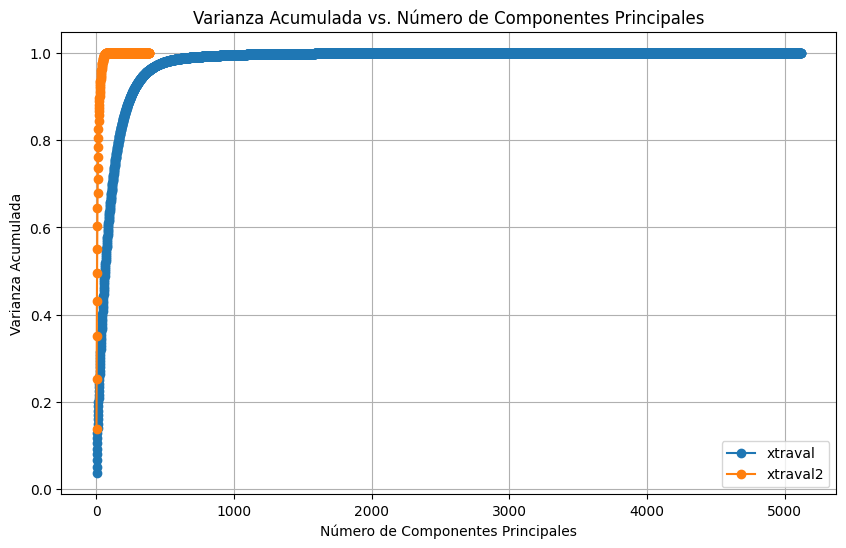

In [10]:
# Graficar la varianza acumulada contra el número de componentes principales
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumsumxtraval) + 1), cumsumxtraval, marker='o', linestyle='-', label='xtraval')
plt.plot(range(1, len(cumsumxtraval2) + 1), cumsumxtraval2, marker='o', linestyle='-', label='xtraval2')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Acumulada vs. Número de Componentes Principales')
plt.legend()
plt.grid(True)
plt.show()

### 2. Desarrollo de modelos mediante regresión lineal y redes neuronales

Se cargan los datos de salida (que consiste en una variable dependiente) con las que se establecerá la regresión (univariable).

In [11]:
ytraval = np.load('C:/Users/marit/Documents/UPY Estancia I/Tarea 5 Bandgaps/ytraval.npy')
ytest = np.load('C:/Users/marit/Documents/UPY Estancia I/Tarea 5 Bandgaps/ytest.npy')

In [12]:
print(ytraval.shape)
print(ytest.shape)

(11906,)
(2976,)


#### Instrucciones

1. Combinar los datos de entrada transformados por PCA (nuevas componentes de los difractogramas y de la representación de los elementos en la muestra) según la varianza recuperada.
2. Entrenar un modelo de regresión lineal utilizando las componentes principales del conjunto de entrenamiento-validación.
3. Probar el modelo obtenido por regresión lineal con las componentes principales del conjunto de prueba.

4. Implementar los pasos 2 y 4 con diferentes redes neuronales. 
5. Comparar los desempeños y seleccionar el mejor modelo con base en el RMSE.

In [13]:
# 1. Combinando datos de entrada.
x_combined_80 = np.concatenate((varxtraval_80, varxtraval2_80), axis=1)
x_combined_95 = np.concatenate((varxtraval_95, varxtraval2_95), axis=1)

x_combined_test_80 = np.concatenate((varxtest_80, varxtest2_80), axis=1)
x_combined_test_95 = np.concatenate((varxtest_95, varxtest2_95), axis=1)

x_combined_80.shape, x_combined_95.shape, x_combined_test_80.shape, x_combined_test_95.shape

((11906, 174), (11906, 377), (2976, 174), (2976, 377))

In [14]:
# 2. Entrenando modelo de regresion lineal. (FALTA HACERLO CON EL XTEST TAMBIEN)
from sklearn.linear_model import LinearRegression

In [15]:
# Crear el modelo de regresión lineal.
modelo_regresion_lineal_80 = LinearRegression()
modelo_regresion_lineal_95 = LinearRegression()

# Entrenar el modelo con las componentes principales del conjunto de entrenamiento-validación.
modelo_regresion_lineal_80.fit(x_combined_80, ytraval)
modelo_regresion_lineal_95.fit(x_combined_95, ytraval)

LinearRegression()

In [16]:
# 3. Probando modelo obtenido con el conjunto de prueba.
from sklearn.metrics import mean_squared_error

In [17]:
# Predecir con el modelo de regresión lineal.
predicciones_regresion_lineal_80 = modelo_regresion_lineal_80.predict(x_combined_test_80)
predicciones_regresion_lineal_95 = modelo_regresion_lineal_95.predict(x_combined_test_95)

# Calcular el RMSE (Root Mean Squared Error).
rmse_regresion_lineal_80 = np.sqrt(mean_squared_error(ytest, predicciones_regresion_lineal_80))
rmse_regresion_lineal_95 = np.sqrt(mean_squared_error(ytest, predicciones_regresion_lineal_95))

print("RMSE del modelo de regresión lineal:", rmse_regresion_lineal_80)
print("RMSE del modelo de regresión lineal:", rmse_regresion_lineal_95)

RMSE del modelo de regresión lineal: 0.908429143601321
RMSE del modelo de regresión lineal: 0.7738156932909369


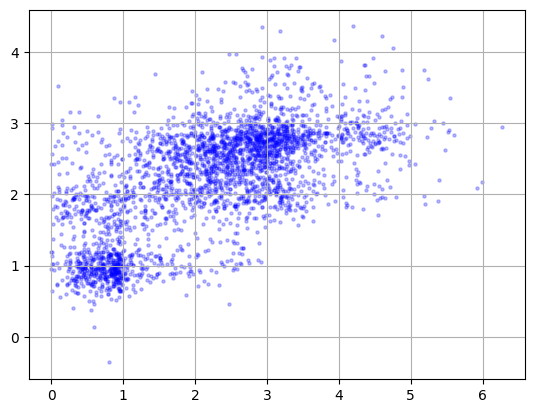

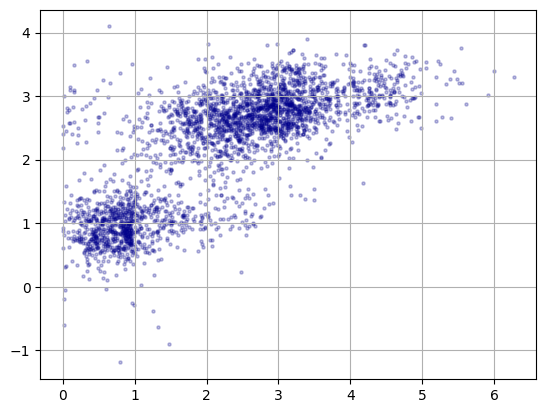

In [34]:
plt.figure()
plt.scatter(ytest, predicciones_regresion_lineal_80, s=5, color='blue', alpha=0.25)
plt.grid()
plt.show()

plt.figure()
plt.scatter(ytest, predicciones_regresion_lineal_95, s=5, color='darkblue', alpha=0.25)
plt.grid()
plt.show()

In [18]:
# 4. Implementando pasos 2 y 4 con diferentes redes neuronales.
import tensorflow as tf

# Verificar si se está utilizando la GPU.
if tf.test.gpu_device_name():
    print('GPU encontrada.')
else:
    print("No se encontró GPU. Se utilizará la CPU.")

GPU encontrada.


### Modelo de red neuronal basico.

In [19]:
# Definir una red neuronal básica (probando con 80).
modelo_red_neuronal_80 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_combined_80.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
modelo_red_neuronal_80.compile(optimizer='adam', loss='mse')

# Entrenar el modelo con las componentes principales del conjunto de entrenamiento-validación
modelo_red_neuronal_80.fit(x_combined_80, ytraval, epochs=50, batch_size=32, verbose=0)

In [20]:
# Definir una red neuronal básica (probando con 95).
modelo_red_neuronal_95 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_combined_95.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
modelo_red_neuronal_95.compile(optimizer='adam', loss='mse')

# Entrenar el modelo con las componentes principales del conjunto de entrenamiento-validación
modelo_red_neuronal_95.fit(x_combined_95, ytraval, epochs=50, batch_size=32, verbose=0)

93/93 [==============================] - 0s 3ms/step
RMSE del modelo de red neuronal: 1.0978039402919662


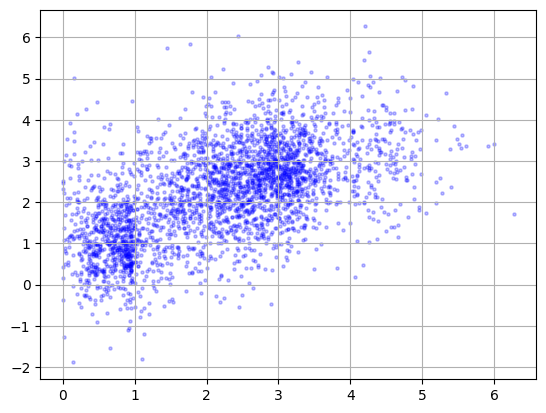

93/93 [==============================] - 0s 3ms/step
RMSE del modelo de red neuronal: 0.9192398386787954


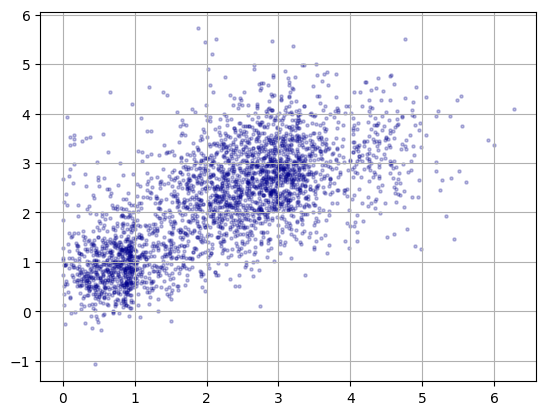

In [21]:
# Predecir con el modelo de red neuronal
predicciones_red_neuronal_80 = modelo_red_neuronal_80.predict(x_combined_test_80)

# Calcular el RMSE (Root Mean Squared Error) del modelo de red neuronal
rmse_red_neuronal_80 = np.sqrt(mean_squared_error(ytest, predicciones_red_neuronal_80))
print("RMSE del modelo de red neuronal:", rmse_red_neuronal_80)

plt.figure()
plt.scatter(ytest, predicciones_red_neuronal_80, s=5, color='blue', alpha=0.25)
plt.grid()
plt.show()

# Predecir con el modelo de red neuronal
predicciones_red_neuronal_95 = modelo_red_neuronal_95.predict(x_combined_test_95)

# Calcular el RMSE (Root Mean Squared Error) del modelo de red neuronal
rmse_red_neuronal_95 = np.sqrt(mean_squared_error(ytest, predicciones_red_neuronal_95))
print("RMSE del modelo de red neuronal:", rmse_red_neuronal_95)
    
plt.figure()
plt.scatter(ytest, predicciones_red_neuronal_95, s=5, color='darkblue', alpha=0.25)
plt.grid()
plt.show()

### Modelo de red neuronal utilizado en previas actividades.

In [22]:
# Definiendo funcion de modelo utilizado en otras tareas.
def create_mlp(features = int, multiples = list, dropout = 0, name= 'multilayer_nn'):
    input_layer = tf.keras.Input((features))

    for n, hl in enumerate(multiples):

        if n == 0: x = tf.keras.layers.Dense(hl*features)(input_layer)
        else: x = tf.keras.layers.Dense(hl*features)(x)

        x = tf.keras.layers.LayerNormalization()(x)

        if n != len(multiples) -1:
            x = tf.keras.layers.LeakyReLU(0.15)(x)
            x = tf.keras.layers.Dropout(dropout)(x)

    xs = tf.keras.layers.Dense(multiples[-1]*features)(input_layer)
    xs = tf.keras.layers.LayerNormalization()(xs)

    x = tf.keras.layers.Add()([x, xs])
    x = tf.keras.layers.LeakyReLU(0.2)(x)
    x = tf.keras.layers.Dropout(dropout)(x)

    x = tf.keras.layers.Dense(1)(x)

    return tf.keras.models.Model(inputs=input_layer, outputs=x, name=name)

In [23]:
# Configuracion del modelo.
multiples = [6,8]
epochs = 25
batch_size = 64
verbose = 1
dropout = 0.5

Epoch 1/25


C:\Users\marit\anaconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\adamax.py:99: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


187/187 [==============================] - 8s 18ms/step - loss: 0.7748 - mean_squared_error: 2.9590 - val_loss: 0.3386 - val_mean_squared_error: 0.9072
Epoch 2/25
187/187 [==============================] - 2s 13ms/step - loss: 0.4420 - mean_squared_error: 1.2472 - val_loss: 0.3283 - val_mean_squared_error: 0.8733
Epoch 3/25
187/187 [==============================] - 2s 13ms/step - loss: 0.3727 - mean_squared_error: 1.0168 - val_loss: 0.3191 - val_mean_squared_error: 0.8607
Epoch 4/25
187/187 [==============================] - 2s 13ms/step - loss: 0.3338 - mean_squared_error: 0.8899 - val_loss: 0.2986 - val_mean_squared_error: 0.7884
Epoch 5/25
187/187 [==============================] - 2s 13ms/step - loss: 0.3061 - mean_squared_error: 0.8069 - val_loss: 0.2941 - val_mean_squared_error: 0.7740
Epoch 6/25
187/187 [==============================] - 2s 13ms/step - loss: 0.2848 - mean_squared_error: 0.7427 - val_loss: 0.2826 - val_mean_squared_error: 0.7466
Epoch 7/25
187/187 [=============

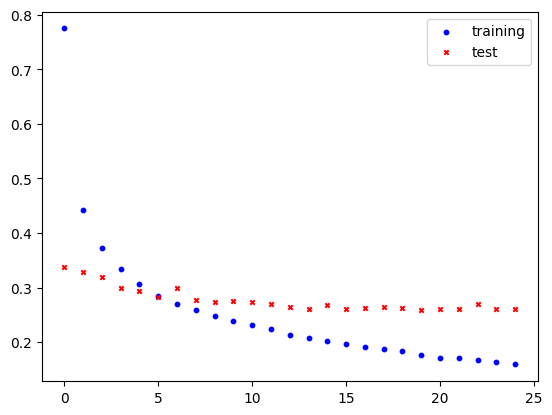

In [24]:
features = x_combined_80.shape[-1]

modelo_red_neuronal_80_2 = create_mlp(features = features, multiples = multiples, dropout = dropout, name='pca_80')

modelo_red_neuronal_80_2.compile(loss='log_cosh', metrics =['MeanSquaredError'],
                      optimizer=tf.keras.optimizers.legacy.Adamax(beta_1=0.9, beta_2=0.999, lr=1e-3, decay=1e-8,))

saveas = 'modelo_red_neuronal_80_2'

modelCheckpoint=tf.keras.callbacks.ModelCheckpoint(str(saveas)+'.h5', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history = tf.keras.callbacks.History()
data = modelo_red_neuronal_80_2.fit(x_combined_80, ytraval, validation_data=(x_combined_test_80, ytest), epochs=epochs, batch_size=batch_size, callbacks=[modelCheckpoint, history], shuffle=True, verbose=verbose)

loss_log = data.history['loss']
val_loss_log = data.history['val_loss']
mat = np.vstack((loss_log, val_loss_log)).T

plt.figure()
plt.scatter(np.arange(mat.shape[0]), mat[:,0], color = 'blue', marker='o', label='training', s=10)
plt.scatter(np.arange(mat.shape[0]), mat[:,1], color = 'red', marker='x', label='test', s=10)
plt.legend(loc='best')
plt.show()

Epoch 1/25
187/187 [==============================] - 6s 21ms/step - loss: 0.7156 - mean_squared_error: 2.6885 - val_loss: 0.2968 - val_mean_squared_error: 0.7873
Epoch 2/25
187/187 [==============================] - 3s 17ms/step - loss: 0.3358 - mean_squared_error: 0.8964 - val_loss: 0.2657 - val_mean_squared_error: 0.6926
Epoch 3/25
187/187 [==============================] - 3s 16ms/step - loss: 0.2683 - mean_squared_error: 0.6870 - val_loss: 0.2504 - val_mean_squared_error: 0.6538
Epoch 4/25
187/187 [==============================] - 3s 16ms/step - loss: 0.2263 - mean_squared_error: 0.5621 - val_loss: 0.2457 - val_mean_squared_error: 0.6371
Epoch 5/25
187/187 [==============================] - 3s 16ms/step - loss: 0.2052 - mean_squared_error: 0.5067 - val_loss: 0.2429 - val_mean_squared_error: 0.6302
Epoch 6/25
187/187 [==============================] - 3s 16ms/step - loss: 0.1899 - mean_squared_error: 0.4651 - val_loss: 0.2393 - val_mean_squared_error: 0.6158
Epoch 7/25
187/187 [==

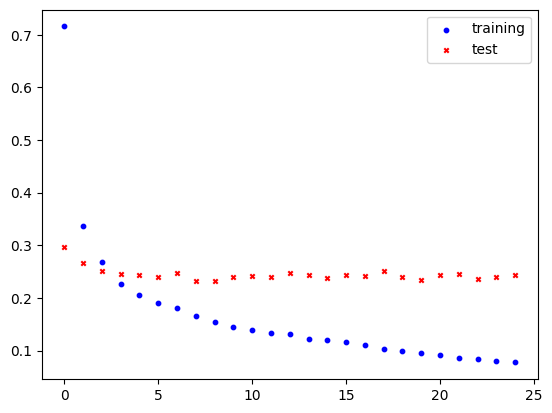

In [25]:
features = x_combined_95.shape[-1]

modelo_red_neuronal_95_2 = create_mlp(features = features, multiples = multiples, dropout = dropout, name='pca_95')

modelo_red_neuronal_95_2.compile(loss='log_cosh', metrics =['MeanSquaredError'],
                      optimizer=tf.keras.optimizers.legacy.Adamax(beta_1=0.9, beta_2=0.999, lr=1e-3, decay=1e-8,))

saveas = 'modelo_red_neuronal_95_2'

modelCheckpoint=tf.keras.callbacks.ModelCheckpoint(str(saveas)+'.h5', monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
history = tf.keras.callbacks.History()
data = modelo_red_neuronal_95_2.fit(x_combined_95, ytraval, validation_data=(x_combined_test_95, ytest), epochs=epochs, batch_size=batch_size, callbacks=[modelCheckpoint, history], shuffle=True, verbose=verbose)

loss_log = data.history['loss']
val_loss_log = data.history['val_loss']
mat = np.vstack((loss_log, val_loss_log)).T

plt.figure()
plt.scatter(np.arange(mat.shape[0]), mat[:,0], color = 'blue', marker='o', label='training', s=10)
plt.scatter(np.arange(mat.shape[0]), mat[:,1], color = 'red', marker='x', label='test', s=10)
plt.legend(loc='best')
plt.show()

93/93 [==============================] - 1s 4ms/step
RMSE del modelo de red neuronal: 0.8328207348699069


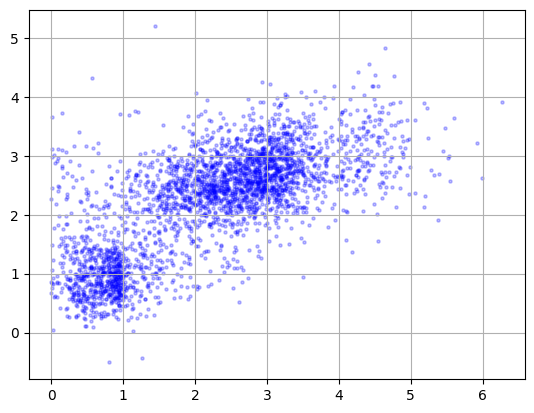

93/93 [==============================] - 1s 4ms/step
RMSE del modelo de red neuronal: 0.7949249108054411


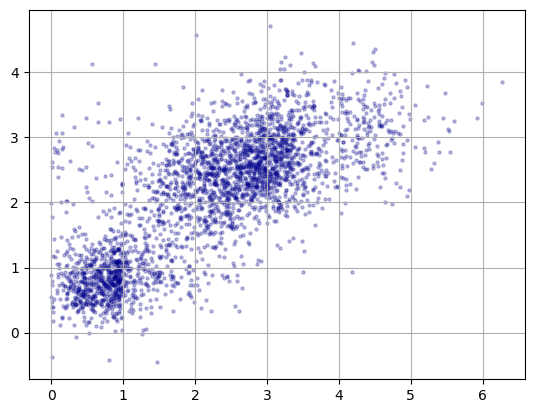

In [26]:
# Predecir con el modelo de red neuronal
predicciones_red_neuronal_80_2 = modelo_red_neuronal_80_2.predict(x_combined_test_80)

# Calcular el RMSE (Root Mean Squared Error) del modelo de red neuronal
rmse_red_neuronal_80_2 = np.sqrt(mean_squared_error(ytest, predicciones_red_neuronal_80_2))
print("RMSE del modelo de red neuronal:", rmse_red_neuronal_80_2)

plt.figure()
plt.scatter(ytest, predicciones_red_neuronal_80_2, s=5, color='blue', alpha=0.25)
plt.grid()
plt.show()

# Predecir con el modelo de red neuronal
predicciones_red_neuronal_95_2 = modelo_red_neuronal_95_2.predict(x_combined_test_95)

# Calcular el RMSE (Root Mean Squared Error) del modelo de red neuronal
rmse_red_neuronal_95_2 = np.sqrt(mean_squared_error(ytest, predicciones_red_neuronal_95_2))
print("RMSE del modelo de red neuronal:", rmse_red_neuronal_95_2)
    
plt.figure()
plt.scatter(ytest, predicciones_red_neuronal_95_2, s=5, color='darkblue', alpha=0.25)
plt.grid()
plt.show()

### Modelo de red neuronal optimizado.

In [27]:
def create_mlp2(input_shape, num_layers=2, units_per_layer=64, activation='relu', dropout_rate=0.2, name='multilayer_nn'):
    model = tf.keras.Sequential(name=name)
    model.add(tf.keras.layers.Input(shape=input_shape))

    for _ in range(num_layers):
        model.add(tf.keras.layers.Dense(units_per_layer, activation=activation))
        model.add(tf.keras.layers.BatchNormalization())
        model.add(tf.keras.layers.Dropout(dropout_rate))

    model.add(tf.keras.layers.Dense(1))  # Capa de salida

    return model

# Definir hiperparámetros
input_shape = x_combined_80.shape[-1]
num_layers = 3
units_per_layer = 128
activation = 'relu'
dropout_rate = 0.3
epochs = 50
batch_size = 32

# Crear modelo MLP
modelo_red_neuronal_80_3 = create_mlp2(input_shape=input_shape, 
                                      num_layers=num_layers, 
                                      units_per_layer=units_per_layer, 
                                      activation=activation, 
                                      dropout_rate=dropout_rate)

# Compilar el modelo
modelo_red_neuronal_80_3.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = modelo_red_neuronal_80_3.fit(x_combined_80, ytraval, 
                                       validation_data=(x_combined_test_80, ytest), 
                                       epochs=epochs, 
                                       batch_size=batch_size, 
                                       verbose=1)

# Evaluar el modelo
loss, mae = modelo_red_neuronal_80_3.evaluate(x_combined_test_80, ytest)
print("Loss:", loss)
print("MAE:", mae)

Epoch 1/50
373/373 [==============================] - 8s 15ms/step - loss: 2.9470 - mae: 1.3385 - val_loss: 1.0445 - val_mae: 0.8153
Epoch 2/50
373/373 [==============================] - 5s 13ms/step - loss: 1.3799 - mae: 0.9276 - val_loss: 0.9004 - val_mae: 0.7367
Epoch 3/50
373/373 [==============================] - 5s 13ms/step - loss: 1.0808 - mae: 0.8169 - val_loss: 0.8258 - val_mae: 0.6959
Epoch 4/50
373/373 [==============================] - 5s 14ms/step - loss: 0.9706 - mae: 0.7721 - val_loss: 0.7920 - val_mae: 0.6759
Epoch 5/50
373/373 [==============================] - 5s 14ms/step - loss: 0.8834 - mae: 0.7331 - val_loss: 0.7850 - val_mae: 0.6706
Epoch 6/50
373/373 [==============================] - 5s 13ms/step - loss: 0.8448 - mae: 0.7128 - val_loss: 0.7680 - val_mae: 0.6606
Epoch 7/50
373/373 [==============================] - 5s 13ms/step - loss: 0.7968 - mae: 0.6902 - val_loss: 0.7510 - val_mae: 0.6484
Epoch 8/50
373/373 [==============================] - 5s 13ms/step - 

In [28]:
# Definir hiperparámetros
input_shape = x_combined_95.shape[-1]
num_layers = 3
units_per_layer = 128
activation = 'relu'
dropout_rate = 0.3
epochs = 50
batch_size = 32

# Crear modelo MLP
modelo_red_neuronal_95_3 = create_mlp2(input_shape=input_shape, 
                                      num_layers=num_layers, 
                                      units_per_layer=units_per_layer, 
                                      activation=activation, 
                                      dropout_rate=dropout_rate)

# Compilar el modelo
modelo_red_neuronal_95_3.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entrenar el modelo
history = modelo_red_neuronal_95_3.fit(x_combined_95, ytraval, 
                                       validation_data=(x_combined_test_95, ytest), 
                                       epochs=epochs, 
                                       batch_size=batch_size, 
                                       verbose=1)

# Evaluar el modelo
loss, mae = modelo_red_neuronal_95_3.evaluate(x_combined_test_95, ytest)
print("Loss:", loss)
print("MAE:", mae)

Epoch 1/50
373/373 [==============================] - 7s 14ms/step - loss: 2.9913 - mae: 1.3368 - val_loss: 0.8641 - val_mae: 0.7294
Epoch 2/50
373/373 [==============================] - 5s 14ms/step - loss: 1.2183 - mae: 0.8701 - val_loss: 0.7209 - val_mae: 0.6431
Epoch 3/50
373/373 [==============================] - 5s 13ms/step - loss: 0.8996 - mae: 0.7438 - val_loss: 0.6628 - val_mae: 0.6143
Epoch 4/50
373/373 [==============================] - 5s 13ms/step - loss: 0.7757 - mae: 0.6850 - val_loss: 0.6208 - val_mae: 0.5892
Epoch 5/50
373/373 [==============================] - 5s 14ms/step - loss: 0.7154 - mae: 0.6513 - val_loss: 0.6060 - val_mae: 0.5843
Epoch 6/50
373/373 [==============================] - 5s 13ms/step - loss: 0.6599 - mae: 0.6227 - val_loss: 0.6010 - val_mae: 0.5756
Epoch 7/50
373/373 [==============================] - 5s 13ms/step - loss: 0.6213 - mae: 0.6008 - val_loss: 0.5939 - val_mae: 0.5768
Epoch 8/50
373/373 [==============================] - 5s 12ms/step - 

93/93 [==============================] - 1s 3ms/step
RMSE del modelo de red neuronal: 0.8298316905582349


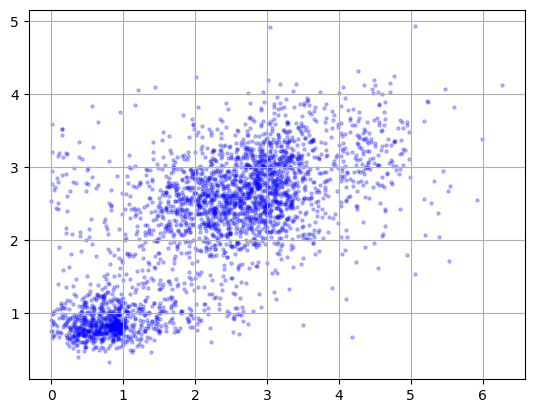

93/93 [==============================] - 1s 4ms/step
RMSE del modelo de red neuronal: 0.7906812761831684


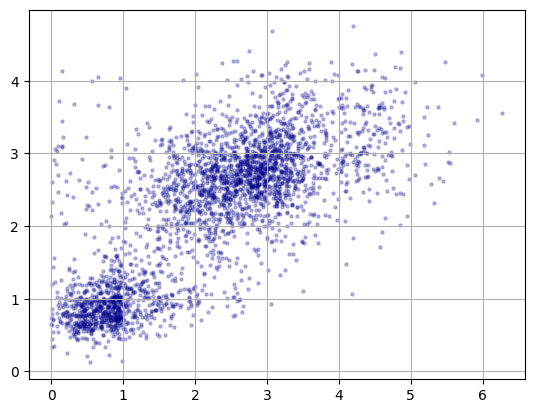

In [29]:
# Predecir con el modelo de red neuronal
predicciones_red_neuronal_80_3 = modelo_red_neuronal_80_3.predict(x_combined_test_80)

# Calcular el RMSE (Root Mean Squared Error) del modelo de red neuronal
rmse_red_neuronal_80_3 = np.sqrt(mean_squared_error(ytest, predicciones_red_neuronal_80_3))
print("RMSE del modelo de red neuronal:", rmse_red_neuronal_80_3)

plt.figure()
plt.scatter(ytest, predicciones_red_neuronal_80_3, s=5, color='blue', alpha=0.25)
plt.grid()
plt.show()

# Predecir con el modelo de red neuronal
predicciones_red_neuronal_95_3 = modelo_red_neuronal_95_3.predict(x_combined_test_95)

# Calcular el RMSE (Root Mean Squared Error) del modelo de red neuronal
rmse_red_neuronal_95_3 = np.sqrt(mean_squared_error(ytest, predicciones_red_neuronal_95_3))
print("RMSE del modelo de red neuronal:", rmse_red_neuronal_95_3)

plt.figure()
plt.scatter(ytest, predicciones_red_neuronal_95_3, s=5, color='darkblue', alpha=0.25)
plt.grid()
plt.show()

### Modelo de red neuronal super optimizado.

In [30]:
from tensorflow.keras import regularizers

# Funcion que crea el modelo de red neuronal (Probar Skip-Connections).
def new_mlp(features= int, dropout=0.5, l2_reg= 0.001, name='packet_multilayer_nn'):
    
    input_layer = tf.keras.Input(shape=(features,))
    
    x = tf.keras.layers.Dense(40)(input_layer)
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.Dense(160, kernel_regularizer = regularizers.l2(l2_reg))(x)
    x = tf.keras.layers.ReLU()(x)    # Probar con LeakyReLU.
    
    x = tf.keras.layers.Dense(180)(x)
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.Dense(160, kernel_regularizer = regularizers.l2(l2_reg))(x)
    x = tf.keras.layers.Dense(130, activation='relu')(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    
    x = tf.keras.layers.Dense(160)(x)
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.Dense(140, activation='relu', kernel_regularizer = regularizers.l2(l2_reg))(x)
    
    
    x = tf.keras.layers.Dense(160)(x)
    x = tf.keras.layers.LayerNormalization()(x)
    x = tf.keras.layers.Dense(40, kernel_regularizer = regularizers.l2(l2_reg))(x)
    x = tf.keras.layers.Dense(30, activation='relu')(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    
    x = tf.keras.layers.Dense(1)(x)
    
    return tf.keras.models.Model(inputs=input_layer, outputs=x, name=name)

Epoch 1/25
187/187 [==============================] - 6s 19ms/step - loss: 1.0531 - mean_squared_error: 1.9198 - val_loss: 0.7993 - val_mean_squared_error: 1.0137
Epoch 2/25
187/187 [==============================] - 3s 15ms/step - loss: 0.8976 - mean_squared_error: 1.3794 - val_loss: 0.7670 - val_mean_squared_error: 0.9702
Epoch 3/25
187/187 [==============================] - 3s 15ms/step - loss: 0.8464 - mean_squared_error: 1.2613 - val_loss: 0.7413 - val_mean_squared_error: 0.9462
Epoch 4/25
187/187 [==============================] - 3s 16ms/step - loss: 0.8074 - mean_squared_error: 1.1948 - val_loss: 0.6889 - val_mean_squared_error: 0.8366
Epoch 5/25
187/187 [==============================] - 3s 16ms/step - loss: 0.7712 - mean_squared_error: 1.1332 - val_loss: 0.6624 - val_mean_squared_error: 0.8112
Epoch 6/25
187/187 [==============================] - 3s 16ms/step - loss: 0.7461 - mean_squared_error: 1.1202 - val_loss: 0.6677 - val_mean_squared_error: 0.8990
Epoch 7/25
187/187 [==

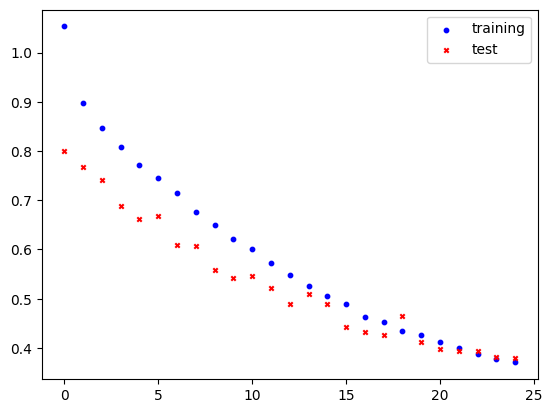

In [31]:
features = x_combined_80.shape[-1]

modelo_red_neuronal_80_4 = new_mlp(features=features, dropout=0.5, l2_reg= 0.001, name='pca_80_4')

modelo_red_neuronal_80_4.compile(loss='log_cosh', metrics =['MeanSquaredError'],
                      optimizer=tf.keras.optimizers.Adamax(beta_1=0.9, beta_2=0.999, learning_rate=1e-3, decay=1e-8,))


history = tf.keras.callbacks.History()
data = modelo_red_neuronal_80_4.fit(x_combined_80, ytraval, validation_data=(x_combined_test_80, ytest), 
                    epochs=25, batch_size=64,
                    callbacks=[history],
                    shuffle=True, verbose=1)

loss_log = data.history['loss']
val_loss_log = data.history['val_loss']
mat = np.vstack((loss_log, val_loss_log)).T

plt.figure()
plt.scatter(np.arange(mat.shape[0]), mat[:,0], color = 'blue', marker='o', label='training', s=10)
plt.scatter(np.arange(mat.shape[0]), mat[:,1], color = 'red', marker='x', label='test', s=10)
plt.legend(loc='best')
plt.show()

Epoch 1/25
187/187 [==============================] - 6s 19ms/step - loss: 1.0298 - mean_squared_error: 1.8343 - val_loss: 0.7410 - val_mean_squared_error: 0.8276
Epoch 2/25
187/187 [==============================] - 3s 16ms/step - loss: 0.8414 - mean_squared_error: 1.1882 - val_loss: 0.6845 - val_mean_squared_error: 0.7076
Epoch 3/25
187/187 [==============================] - 3s 15ms/step - loss: 0.7895 - mean_squared_error: 1.0747 - val_loss: 0.6651 - val_mean_squared_error: 0.7034
Epoch 4/25
187/187 [==============================] - 3s 16ms/step - loss: 0.7558 - mean_squared_error: 1.0240 - val_loss: 0.6570 - val_mean_squared_error: 0.7337
Epoch 5/25
187/187 [==============================] - 3s 15ms/step - loss: 0.7250 - mean_squared_error: 0.9825 - val_loss: 0.6083 - val_mean_squared_error: 0.6468
Epoch 6/25
187/187 [==============================] - 3s 15ms/step - loss: 0.6924 - mean_squared_error: 0.9415 - val_loss: 0.5799 - val_mean_squared_error: 0.6259
Epoch 7/25
187/187 [==

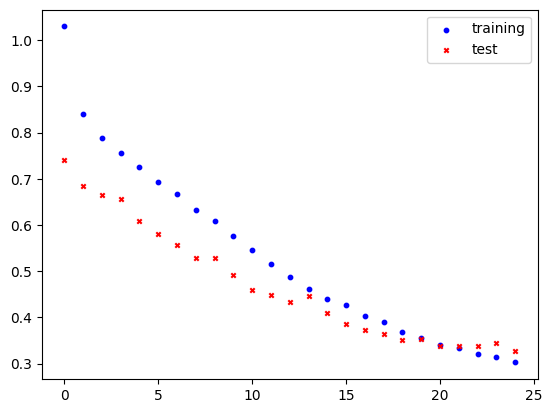

In [32]:
features = x_combined_95.shape[-1]

modelo_red_neuronal_95_4 = new_mlp(features=features, dropout=0.5, l2_reg= 0.001, name='pca_95_4')

modelo_red_neuronal_95_4.compile(loss='log_cosh', metrics =['MeanSquaredError'],
                      optimizer=tf.keras.optimizers.Adamax(beta_1=0.9, beta_2=0.999, learning_rate=1e-3, decay=1e-8,))


history = tf.keras.callbacks.History()
data = modelo_red_neuronal_95_4.fit(x_combined_95, ytraval, validation_data=(x_combined_test_95, ytest), 
                    epochs=25, batch_size=64,
                    callbacks=[history],
                    shuffle=True, verbose=1)

loss_log = data.history['loss']
val_loss_log = data.history['val_loss']
mat = np.vstack((loss_log, val_loss_log)).T

plt.figure()
plt.scatter(np.arange(mat.shape[0]), mat[:,0], color = 'blue', marker='o', label='training', s=10)
plt.scatter(np.arange(mat.shape[0]), mat[:,1], color = 'red', marker='x', label='test', s=10)
plt.legend(loc='best')
plt.show()

93/93 [==============================] - 1s 5ms/step
RMSE del modelo de red neuronal: 0.862927814035729


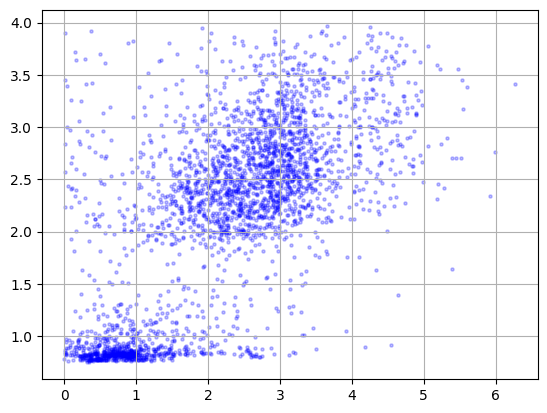

93/93 [==============================] - 1s 5ms/step
RMSE del modelo de red neuronal: 0.8092498879636921


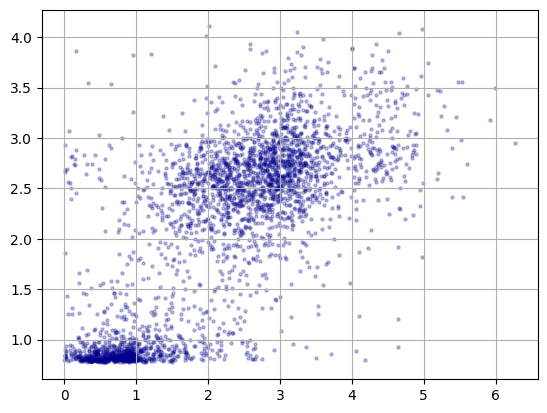

In [33]:
# Predecir con el modelo de red neuronal
predicciones_red_neuronal_80_4 = modelo_red_neuronal_80_4.predict(x_combined_test_80)

# Calcular el RMSE (Root Mean Squared Error) del modelo de red neuronal
rmse_red_neuronal_80_4 = np.sqrt(mean_squared_error(ytest, predicciones_red_neuronal_80_4))
print("RMSE del modelo de red neuronal:", rmse_red_neuronal_80_4)

plt.figure()
plt.scatter(ytest, predicciones_red_neuronal_80_4, s=5, color='blue', alpha=0.25)
plt.grid()
plt.show()

# Predecir con el modelo de red neuronal
predicciones_red_neuronal_95_4 = modelo_red_neuronal_95_4.predict(x_combined_test_95)

# Calcular el RMSE (Root Mean Squared Error) del modelo de red neuronal
rmse_red_neuronal_95_4 = np.sqrt(mean_squared_error(ytest, predicciones_red_neuronal_95_4))
print("RMSE del modelo de red neuronal:", rmse_red_neuronal_95_4)

plt.figure()
plt.scatter(ytest, predicciones_red_neuronal_95_4, s=5, color='darkblue', alpha=0.25)
plt.grid()
plt.show()